In [7]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/')

Mounted at /content/drive


In [8]:
from google.colab import files
# uploaded = files.upload()

In [9]:
# Import numpy and pandas
import pandas as pd
import requests
import seaborn as sns
from matplotlib import pyplot as plt

In [10]:
# Import NLTK
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords


### 1. Load .csv

In [11]:
df = pd.read_csv("drive/MyDrive/Colab Notebooks/csv_data/lotr_scripts.csv",encoding = "ISO-8859-1")
df.drop(columns=['ï»¿'], inplace=True)

In [12]:
df.head()

,char,dialog,movie
0,DEAGOL,"Oh Smeagol Ive got one! , Ive got a fish Smeag...",The Return of the King
1,SMEAGOL,"Pull it in! Go on, go on, go on, pull it in!",The Return of the King
2,DEAGOL,Arrghh!,The Return of the King
3,SMEAGOL,Deagol!,The Return of the King
4,SMEAGOL,Deagol!,The Return of the King


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2385 entries, 0 to 2384
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   char    2385 non-null   object
 1   dialog  2383 non-null   object
 2   movie   2380 non-null   object
dtypes: object(3)
memory usage: 56.0+ KB


In [14]:
df['dialog'] = df['dialog'].astype(str)
df.head()

,char,dialog,movie
0,DEAGOL,"Oh Smeagol Ive got one! , Ive got a fish Smeag...",The Return of the King
1,SMEAGOL,"Pull it in! Go on, go on, go on, pull it in!",The Return of the King
2,DEAGOL,Arrghh!,The Return of the King
3,SMEAGOL,Deagol!,The Return of the King
4,SMEAGOL,Deagol!,The Return of the King


### 2. Tokenization

RegexpTokenizer(r'\w+')

tokenizer.tokenize(string)

In [15]:
def tokenize (string):
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(string)
    return tokens

In [16]:
df["dialog"] = df["dialog"].apply(tokenize)

In [17]:
df.head()

,char,dialog,movie
0,DEAGOL,"[Oh, Smeagol, Ive, got, one, Ive, got, a, fish...",The Return of the King
1,SMEAGOL,"[Pull, it, in, Go, on, go, on, go, on, pull, i...",The Return of the King
2,DEAGOL,[Arrghh],The Return of the King
3,SMEAGOL,[Deagol],The Return of the King
4,SMEAGOL,[Deagol],The Return of the King


In [18]:
df['dialog'] = df['dialog'].apply(lambda x: " ".join(x))
df.head()

,char,dialog,movie
0,DEAGOL,Oh Smeagol Ive got one Ive got a fish Smeagol ...,The Return of the King
1,SMEAGOL,Pull it in Go on go on go on pull it in,The Return of the King
2,DEAGOL,Arrghh,The Return of the King
3,SMEAGOL,Deagol,The Return of the King
4,SMEAGOL,Deagol,The Return of the King


### 3. Stop words

In [19]:
nltk.download('stopwords') #stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [26]:
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [20]:
stop_words = set(stopwords.words('english'))
print(stop_words)

{'who', 'what', 'all', 'his', 'then', 'between', 'we', 'that', 'through', "didn't", "mightn't", 'will', 'yours', 'during', "it's", 'd', "isn't", 'after', 'been', 'him', 'hers', 'needn', 'very', 'shouldn', 'y', 'nor', 'ourselves', 'other', 'both', 've', 'himself', 'had', 'over', 'm', 'by', "she's", "aren't", 'own', 'not', 'did', "shouldn't", 'their', "hasn't", 'from', 'me', 'there', 'these', 'was', 'myself', 'an', 'whom', "hadn't", 'because', 'is', "weren't", "you're", 'ain', 'it', 'when', 'yourself', 'its', 'can', 'are', "mustn't", 'hadn', 'this', 'off', 'should', 'didn', 'how', 'any', 'll', "you'll", "you've", 'being', 'which', 'down', 'they', 'yourselves', 'again', 'such', 'theirs', 'he', "wasn't", 'in', 'her', 'some', "shan't", 'until', 'under', 'more', 'mustn', 'isn', 'i', 'the', 'with', "you'd", 'up', 'about', 'so', 'few', 'doesn', "couldn't", 'were', 'shan', 's', 'each', 'at', 'having', "needn't", 't', 'them', "haven't", 'doing', 'why', 'o', 'or', 'ma', 'couldn', 'to', 'above', '

In [21]:
df["dialog"] = df["dialog"].apply(lambda x: x.split(" "))

In [22]:
def stop_words (lista):
    stop_words = set(stopwords.words('english'))
    nueva_lista = []
    for string in lista:
        if string not in stop_words:
            nueva_lista.append(string)
    return " ".join(nueva_lista)

In [23]:
df["dialog"] = df["dialog"].apply(stop_words)
df.head()

,char,dialog,movie
0,DEAGOL,Oh Smeagol Ive got one Ive got fish Smeagol Sm...,The Return of the King
1,SMEAGOL,Pull Go go go pull,The Return of the King
2,DEAGOL,Arrghh,The Return of the King
3,SMEAGOL,Deagol,The Return of the King
4,SMEAGOL,Deagol,The Return of the King


### 4. Sentiment analysis

4.1 NLTK

sia.polarity_scores(the_string)

Args: string

Returns: polarity

In [27]:
sia = SentimentIntensityAnalyzer()

In [28]:
sentence = "Gollum' Gollum' Gollum' , and we wept precious. We wept to be so alone."

In [29]:
polarity = sia.polarity_scores(sentence)

In [33]:
polarity

{'compound': -0.6015, 'neg': 0.404, 'neu': 0.422, 'pos': 0.174}

In [34]:
def sentimentAnalysis(sentence):
    sia = SentimentIntensityAnalyzer()
    polarity = sia.polarity_scores(sentence)
    pol = polarity['compound']
    return pol

In [35]:
sentimentAnalysis(sentence)

-0.6015

In [36]:
df['sentiment_compound'] = df.dialog.apply(sentimentAnalysis)
df.head()

,char,dialog,movie,sentiment_compound
0,DEAGOL,Oh Smeagol Ive got one Ive got fish Smeagol Sm...,The Return of the King,0.0
1,SMEAGOL,Pull Go go go pull,The Return of the King,0.0
2,DEAGOL,Arrghh,The Return of the King,0.0
3,SMEAGOL,Deagol,The Return of the King,0.0
4,SMEAGOL,Deagol,The Return of the King,0.0


### 5. Graphical visualizations

In [37]:
resumen = df.groupby(['char'])['sentiment_compound'].mean().sort_values()
resumen

char
FARMER MAGGOT      -0.659700
SHARKU             -0.648600
ARMY               -0.599400
EOWYN/MERRY        -0.599400
WILDMAN            -0.543267
                      ...   
BARLIMAN            0.299300
MERRY and PIPPIN    0.379000
EOTHAIN             0.401900
HOBBIT              0.427167
LADY                0.659700
Name: sentiment_compound, Length: 85, dtype: float64

Text(0.5, 1.0, 'Average sentiment of the characters')

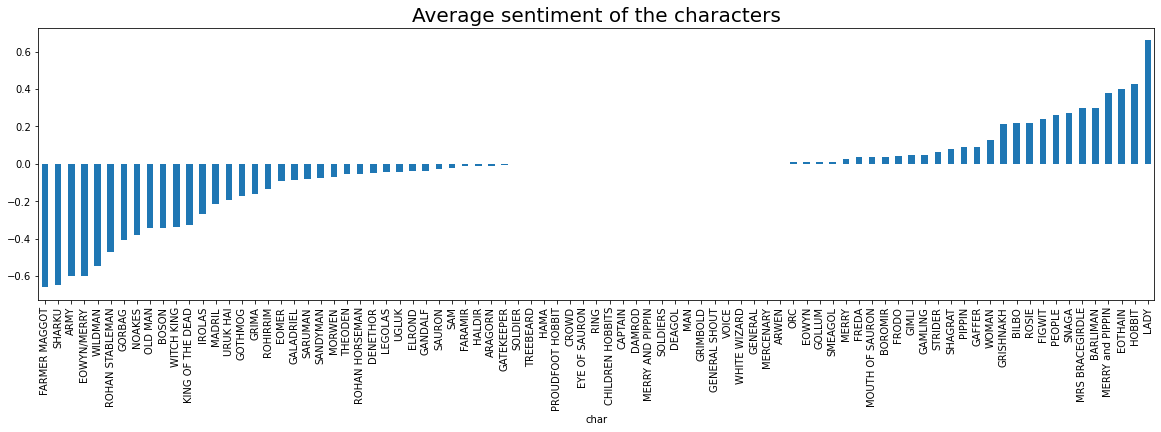

In [38]:
fig = resumen.plot(kind="bar", fontsize=10, figsize=(20,5))
plt.title('Average sentiment of the characters', fontsize = 20, fontweight = 14)

In [184]:
# fig.savefig("sentiment_analysis_01.png")

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3747: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


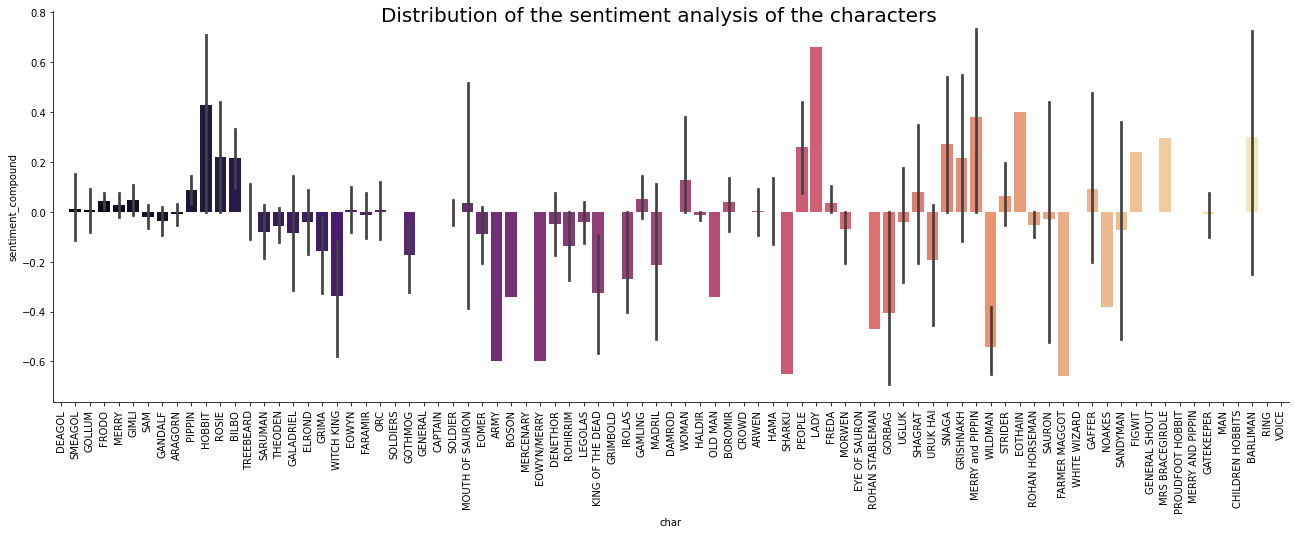

In [53]:
fig1 = sns.catplot(x="char", y="sentiment_compound",  kind="bar", palette="magma",size=6, aspect=3, data=df)
fig1.fig.suptitle('Distribution of the sentiment analysis of the characters', fontsize = 20)
fig1.set_xticklabels(rotation=90)

In [147]:
# fig1.savefig("sentiment_analysis_02.png")